<hr style="border:2px solid gray"> </hr>

# Homework 1 - Traveling Salesman Problem

## Example Code

### Algorithm 2: Hill Climbing

### Author: Wangduk Seo (CAU AI Lab)
<hr style="border:2px solid gray"> </hr>

# Step 0. Importing packages and Global Settings

---------------------------------------------------------------
## (Optional) For Colab

In [ ]:
# from google.colab import drive
# import os, sys
# drive.mount('gdrive', force_remount=True)

---------------------------------------------------------------

In [1]:
# package list
import numpy as np
import sys
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import time

# Global Variables
# Hill Climbing
SUB_ITERATIONS = 10 # Iteration of 2-opt search in each evaluation
MAX_EVALUATION = 1000 # Max hill climbing iterations

# Plot Settings
PLOT_MODE = True # Draw Route
plt.ion()

# First City Index
FIRST_IDX = 0

In [22]:
file_path = 'data3.txt'

# Step 1. Data Loading

In [3]:
def fileloader():
    #     Data Format
    #     ---------------------------------------------------------
    #     NAME : pia3056
    #     COMMENT : Bonn VLSI data set with 3056 points
    #     COMMENT : Uni Bonn, Research Institute for Discrete Math
    #     COMMENT : Contributed by Andre Rohe
    #     TYPE : TSP
    #     DIMENSION : 3056 -----------------------------|
    #     EDGE_WEIGHT_TYPE : EUC_2D                     |
    #     NODE_COORD_SECTION                            |
    #     1 0 11 (2 dimentional coordinate of city)     |
    #     2 0 115                                       |
    #     ...                                           |
    #     ...(Total 3056 nodes)<------------------------|
    #     EOF
    #     ---------------------------------------------------------
    with open(file_path, "r") as file:
        file_str = file.readlines()

    # Get the coordinates of cities
    coord_str = file_str[8:-1]  # first city string to last city string (EOF 전까지)
    coord_list = np.zeros((len(coord_str), 2))
    for idx, item in enumerate(coord_str):
        items = item.split()
        coord_list[idx, 0], coord_list[idx, 1] = int(items[1]), int(items[2])

    return coord_list

# Step 2. Initialization

In [4]:
def initialize_greedy(coord_list, first_idx):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    path = np.zeros(cnt_cities + 1, dtype=np.int32)
    path[0], path[-1] = first_idx, first_idx

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool_)
    cities_tovisit[first_idx] = False

    # Iteratively Connect nearest cities
    for i in range(1, cnt_cities):
        start_idx = path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                break
        cities_tovisit[nearest_city] = False
        path[i] = nearest_city

    return path_map, path


def initialize_random(coord_list, first_idx):
    cnt_cities = len(coord_list)
    path = np.zeros(cnt_cities + 1, dtype=np.int)

    path[0], path[-1] = first_idx, first_idx
    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    # city indices without first city index
    cities_tovisit = np.delete(np.arange(cnt_cities), first_idx)
    cities_random = np.random.permutation(cities_tovisit)
    path[1:-1] = cities_random

    return path_map, path

def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

# Step 3. Searching a path

## Algorithm 2. Hill Climbing (2-opt search)

In [5]:
# random 2 opt -> 가장 긴 간선 개선 먼저? 바깥쪽? / 어떻게 결정할 것인지
# 3 opt (처음엔 빠르고 잘되는데 어느정도 수렴하면 성능 안좋음) -> 2 opt (적당)

In [6]:
# flip point total random choice => 

In [7]:
def two_opt(path_map, path, iterations, coord_list):
    cnt_cities = path_map.shape[0]
    # Save the best path

    cost_arr = path_cost(path_map, path)
    best_path = path.copy()
    best_cost = cost_arr.sum()
    

    for i in range(iterations):
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)

        # Compare to the best path
        curr_cost = cost_arr.sum()
        if curr_cost < best_cost:
            best_path = curr_path
            best_cost = curr_cost

    return best_path, best_cost

In [8]:
def hill_climbing(path_map, path, coord_list):
    best_path, best_cost = two_opt(path_map, path, SUB_ITERATIONS, coord_list)

    for i in range(MAX_EVALUATION - 1):
        curr_path = best_path.copy()
        new_path, new_cost = two_opt(path_map, curr_path, SUB_ITERATIONS, coord_list)

        if new_cost < best_cost:
            best_path = new_path
            best_cost = new_cost

    if PLOT_MODE:
        plt.close()
        figure, ax = plt.subplots()
        plt.scatter(coord_list[:, 0], coord_list[:, 1], c='red', s=10)
        plt.title('City Route')
        coord_path = coord_list
        coord_path = np.append(coord_path, coord_path[best_path[0], :].reshape(1, 2), axis=0)
        coord_path[:, :] = coord_path[best_path, :]
        lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
        figure.canvas.draw()
        figure.canvas.flush_events()
        plt.show()
    return best_path, best_cost

# Main

In [24]:
file_path = 'data2.txt'

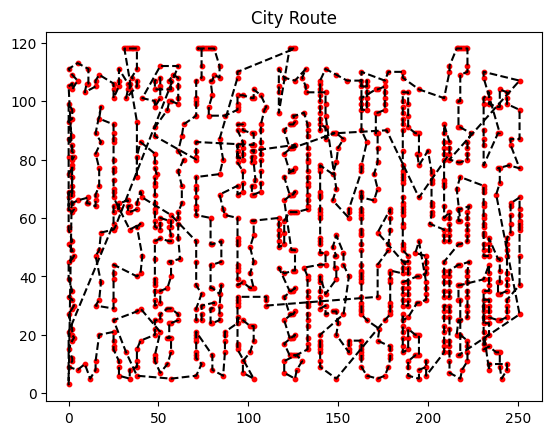

Execution Time: 2.6964380741119385
Path: [0, 22, 21, 54, 23, 1, 55, 63, 62, 60, 59, 67, 68, 78, 91, 90, 89, 118, 119, 121, 131, 137, 136, 130, 127, 148, 149, 144, 151, 152, 147, 146, 145, 138, 132, 128, 126, 163, 160, 161, 169, 201, 200, 199, 205, 198, 197, 196, 195, 194, 193, 192, 191, 190, 216, 217, 218, 234, 248, 247, 233, 246, 245, 232, 215, 189, 188, 187, 186, 185, 184, 183, 182, 213, 214, 223, 242, 243, 231, 264, 257, 258, 259, 260, 265, 266, 261, 268, 262, 267, 269, 297, 298, 270, 271, 272, 302, 303, 304, 300, 299, 309, 310, 311, 312, 316, 325, 334, 337, 336, 333, 324, 315, 323, 314, 313, 356, 386, 387, 388, 357, 389, 408, 419, 420, 436, 450, 446, 445, 444, 443, 442, 441, 440, 439, 438, 437, 428, 412, 413, 429, 435, 430, 414, 415, 431, 432, 416, 521, 474, 483, 493, 505, 520, 473, 482, 492, 504, 519, 471, 490, 502, 516, 515, 501, 467, 454, 480, 489, 500, 514, 466, 479, 488, 499, 513, 465, 478, 487, 498, 512, 464, 477, 486, 497, 511, 524, 528, 526, 517, 472, 463, 534, 535, 536, 53

In [25]:
# Initialization ###############
initialize = initialize_greedy
#initialize = initialize_random
################################

# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()
# Step 2
path_map, path = initialize(coord_list, FIRST_IDX)

# Step 3
best_path, best_cost = hill_climbing(path_map, path, coord_list)

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))